In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# basic operatrions

### image open

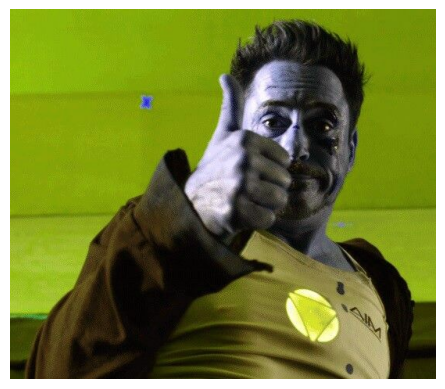

In [13]:
img = cv2.imread('images/stark.jpg')
plt.imshow(img, cmap='gray')
plt.axis( 'off')
plt.show()

### image is odd, because opencv reads in bgr format instrad of rgb format.

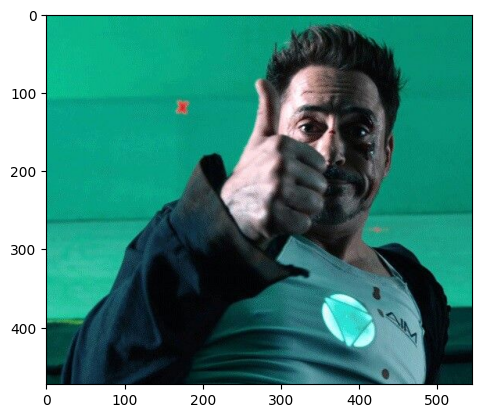

In [14]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

### image shape


In [15]:
img_shape=img.shape
print(img_shape)


(473, 545, 3)


### show region of image

(200, 200, 3)


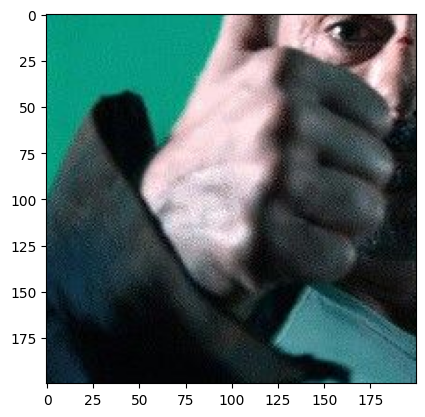

In [16]:
x,y=img_shape[:-1]

## show 200 x 200 picels from center
cx=int(x/2)
cy=int(y/2)
sub_img= img[cx-100:cx+100,cy-100:cy+100]
print(sub_img.shape)
plt.imshow(sub_img)

### modify region of image

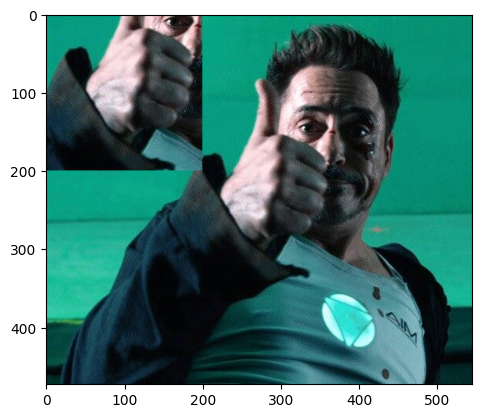

In [17]:
img_1 =img.copy()
# copy image
# replace left top, 200 x 200 with previous sub_image
img_1[:200,:200]=sub_img
plt.imshow(img_1)


### resize of image

original dmension is  (225, 225, 3)
Resized Dimensions :  (135, 135, 3)


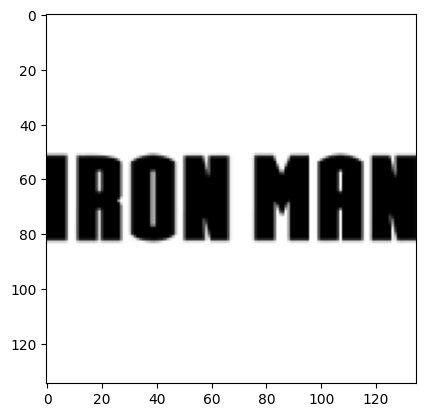

In [18]:
logo=cv2.imread('images/logo.png')
org_shape=logo.shape
print('original dmension is ', org_shape )
scale_percent = 60 # percent of original size
width = int(org_shape[1] * scale_percent / 100)
height = int(org_shape[0] * scale_percent / 100)
new_dim = (width, height)

# resize image
logo_resized = cv2.resize(logo, new_dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',logo_resized.shape)
plt.imshow(logo_resized) 
plt.show()


In [19]:
def sizeandshow(plhldr):
    plt.imshow(plhldr)
    print(plhldr.shape)
    plt.show()

# Advanced operations

### overlay logo
credits - https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html
opencv and sendtex


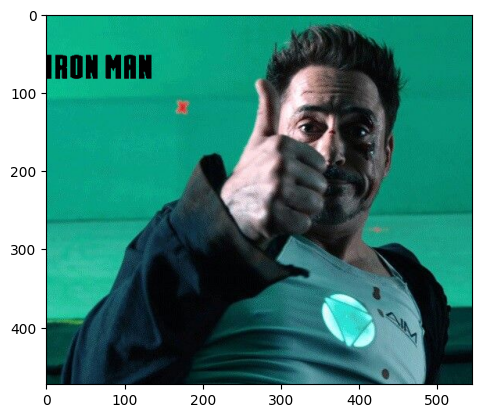

In [20]:
img1=img
img2=logo_resized

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# add a threshold
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)


(473, 545, 3)


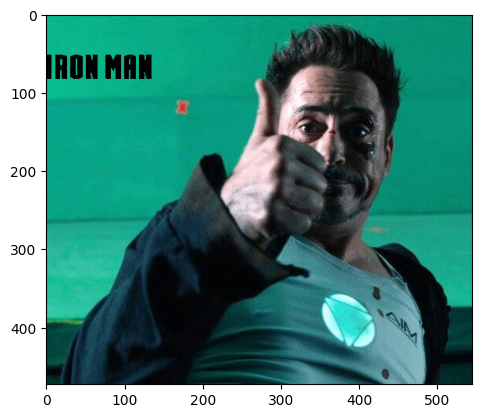

In [21]:
img1[0:rows, 0:cols ] = img1_bg
sizeandshow(img1)

### color filtering

(473, 545, 3)


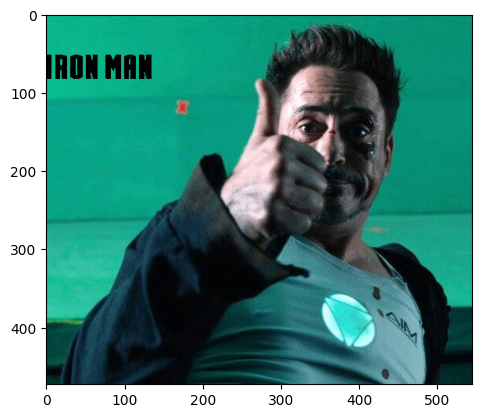

(473, 545)


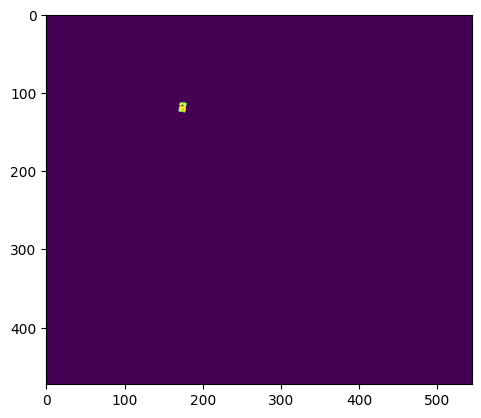

(473, 545, 3)


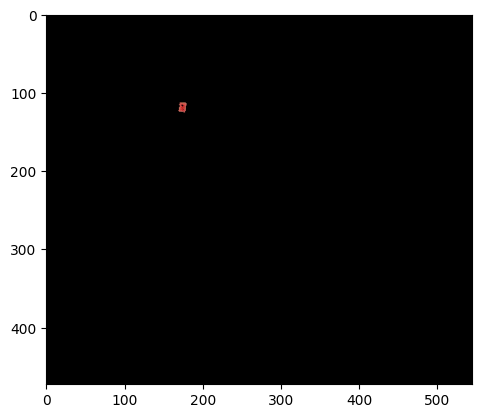

(473, 545, 3)


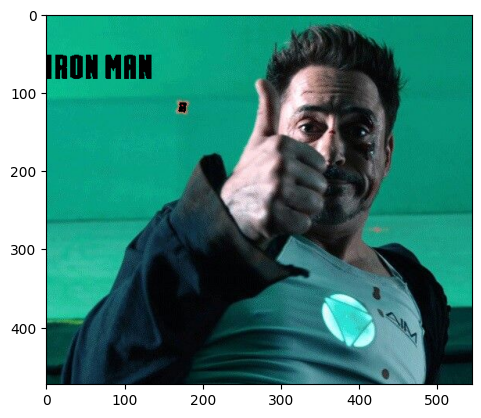

In [37]:
#plt.imshow(img)
img1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)


lower=np.array([0    ,120  ,150])
upper=np.array([10 ,255,255])

mask=cv2.inRange(img1,lower,upper)
mask_inv=cv2.bitwise_not(mask)
res=cv2.bitwise_and(img,img,mask=mask)
res_inv=cv2.bitwise_and(img,img,mask=mask_inv)
sizeandshow(img)
sizeandshow(mask)
sizeandshow(res)

sizeandshow(res_inv)

# Edge Detection

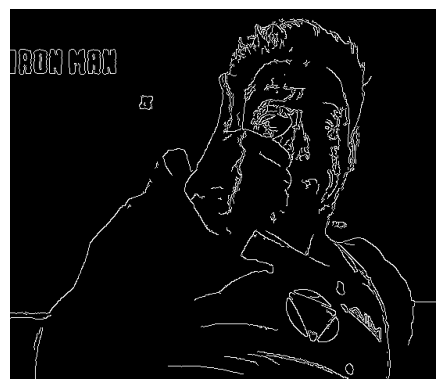

In [38]:
# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)
plt.figure()
plt.imshow(edges, cmap='gray')
plt.axis( 'off')
plt.show()

# Contour detection

Number of Contours found = 147


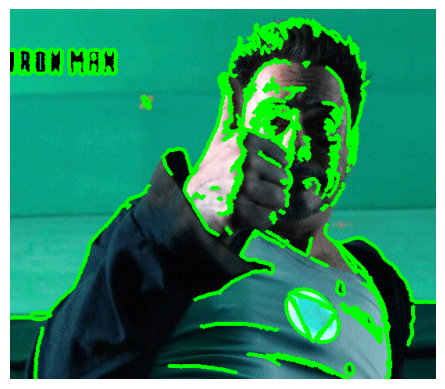

In [39]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray,100, 200, 3, L2gradient=True)
plt.axis('off')
#plt.imshow(edged,cmap='gray')

# Finding Contours

# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow( img)

